## Quiz #0502

### "Human Activity Recognition" 

#### Answer the following questions by providing Python code:
#### Objectives:
- Carry out the EDA.
- Carry out the data pre-processing.
- Optimize and test a predictive model of your choice.

In [5]:
!pip install xgboost

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/human+activity+recognition+using+smartphones).

In [50]:
# Go to the directory where the data file is located. 
os.chdir(r'C:\Users\pc\OneDrive\Bureau')                # Please, replace the path with your own. 

In [51]:
df = pd.read_csv('data_human activity recognition.csv', header='infer')

In [52]:
df.shape

(19622, 160)

In [53]:
df.columns

Index(['Unnamed: 0', 'user_name', 'raw_timestamp_part_1',
       'raw_timestamp_part_2', 'cvtd_timestamp', 'new_window', 'num_window',
       'roll_belt', 'pitch_belt', 'yaw_belt',
       ...
       'gyros_forearm_x', 'gyros_forearm_y', 'gyros_forearm_z',
       'accel_forearm_x', 'accel_forearm_y', 'accel_forearm_z',
       'magnet_forearm_x', 'magnet_forearm_y', 'magnet_forearm_z', 'classe'],
      dtype='object', length=160)

1). Carry out the EDA. Check for the missing values. HINT: The response variable is 'classe'.

In [54]:
df.isnull().values.any()

True

In [58]:
df.isnull().sum().sum()

1921600

2). Get rid of the columns that have more than 97% missing values.

In [62]:
missing = df.isnull().sum() * 100 / len(df)
missing[missing>97] 
df.drop(missing[missing>97].index.tolist(), axis=1, inplace=True)
df

,Unnamed: 0,user_name,raw_timestamp_part_1,raw_timestamp_part_2,cvtd_timestamp,new_window,num_window,roll_belt,pitch_belt,yaw_belt,...,gyros_forearm_x,gyros_forearm_y,gyros_forearm_z,accel_forearm_x,accel_forearm_y,accel_forearm_z,magnet_forearm_x,magnet_forearm_y,magnet_forearm_z,classe
0,1,carlitos,1323084231,788290,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.03,0.00,-0.02,192,203,-215,-17,654.0,476.0,A
1,2,carlitos,1323084231,808298,05/12/2011 11:23,no,11,1.41,8.07,-94.4,...,0.02,0.00,-0.02,192,203,-216,-18,661.0,473.0,A
2,3,carlitos,1323084231,820366,05/12/2011 11:23,no,11,1.42,8.07,-94.4,...,0.03,-0.02,0.00,196,204,-213,-18,658.0,469.0,A
3,4,carlitos,1323084232,120339,05/12/2011 11:23,no,12,1.48,8.05,-94.4,...,0.02,-0.02,0.00,189,206,-214,-16,658.0,469.0,A
4,5,carlitos,1323084232,196328,05/12/2011 11:23,no,12,1.48,8.07,-94.4,...,0.02,0.00,-0.02,189,206,-214,-17,655.0,473.0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19617,19618,adelmo,1322832937,588376,02/12/2011 13:35,no,864,147.00,-34.80,129.0,...,1.73,-1.75,-0.25,-271,-68,-37,-205,-587.0,6.0,E
19618,19619,adelmo,1322832937,596287,02/12/2011 13:35,no,864,145.00,-35.30,130.0,...,1.59,-1.36,0.00,-271,-91,-43,-151,-635.0,-36.0,E
19619,19620,adelmo,1322832937,636283,02/12/2011 13:35,no,864,145.00,-35.50,130.0,...,1.54,-1.20,0.05,-263,-99,-45,-116,-654.0,-70.0,E
19620,19621,adelmo,1322832937,964299,02/12/2011 13:35,no,864,143.00,-35.90,131.0,...,1.48,-0.90,0.05,-270,-141,-51,-68,-678.0,-98.0,E


3). Get rid of the unnecessary columns. HINT: Those columns with "time" in the name and those that are obviously unnecessary.

In [63]:
df.drop(["Unnamed: 0", "user_name"]+[tc for tc in df.columns.tolist() if 'time' in tc], axis=1, inplace=True)
df["new_window"]=df.new_window.map((dict(yes=1, no=0)))

4). Label encode the responde variable. HINT: use preprocessing.LabelEncoder(). 

In [66]:
labelEncoder = preprocessing.LabelEncoder()
df["classe"] = labelEncoder.fit_transform(df["classe"])
df["classe"]

0        0
1        0
2        0
3        0
4        0
        ..
19617    4
19618    4
19619    4
19620    4
19621    4
Name: classe, Length: 19622, dtype: int64

5). Carry out min-max scaling of the exploratory variables. HINT: use preprocessing.MinMaxScaler().

In [67]:
scaler = preprocessing.MinMaxScaler()
scaled = scaler.fit_transform(df.drop("classe", axis=1))

6). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s)
- Calculate the accuracy.
- Aim for upper 90% accuracy.

In [68]:
X_train, X_test, y_train, y_test = train_test_split(scaled, df.classe, random_state=123)

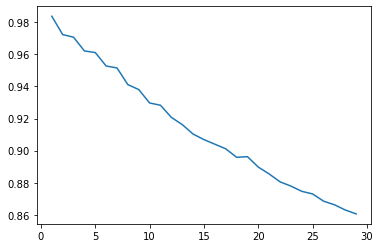

In [69]:
score = []
for i in range(1,30):
    kNN = KNeighborsClassifier(n_neighbors=i)
    kNN.fit(X_train, y_train)
    y_pred = kNN.predict(X_test)
    score.append(metrics.accuracy_score(y_test, y_pred))
plt.plot([i for i in range(1,30)], score)

In [70]:
kNN = KNeighborsClassifier(n_neighbors=2)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)
score.append(metrics.accuracy_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9722788422339992


when the data is scaled, knn work well